In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


**1. LOAD DATA**

In [ ]:
df = pd.read_csv('Train_data.csv')
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [ ]:
df.tail()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
7155,H5290,2012,1.000000,1,V,V,V,U,NaN,1,2001.0,.,NaN,0
7156,H5926,2013,1.000000,0,V,V,V,U,NaN,2,1980.0,.,NaN,1
7157,H6204,2016,0.038251,0,V,V,V,U,NaN,1,1992.0,.,NaN,0
7158,H6537,2013,1.000000,0,V,V,V,U,NaN,1,1972.0,.,NaN,0
7159,H7470,2014,1.000000,0,V,V,V,U,NaN,1,2004.0,.,NaN,0


In [ ]:
df.shape

(7160, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.3+ KB


In [ ]:
df.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


**2. DATA CLEANING**

In [56]:
#Handle 'NumberOfWindows'
df['NumberOfWindows'] = pd.to_numeric(df['NumberOfWindows'], errors='coerce')
df['NumberOfWindows'] = df['NumberOfWindows'].fillna(df['NumberOfWindows'].median())
df['NumberOfWindows'] = df['NumberOfWindows'].astype(int)

#Fill missing Building Dimension with median
df['Building Dimension'] = pd.to_numeric(
    df['Building Dimension'], errors='coerce'
)
df['Building Dimension'] = df['Building Dimension'].fillna(
    df['Building Dimension'].median()
)

#Handle 'Date_of_Occupancy' as a numeric year column
df['Date_of_Occupancy'] = pd.to_numeric(
    df['Date_of_Occupancy'], errors='coerce'
)
df['Date_of_Occupancy'] = df['Date_of_Occupancy'].fillna(
    df['Date_of_Occupancy'].median()
)
df['Date_of_Occupancy'] = df['Date_of_Occupancy'].astype(int)

# Handle missing values in 'Garden' by filling with the mode
df['Garden'] = df['Garden'].fillna(df['Garden'].mode()[0])

#Drop Customer Id and Geo_Code and assign to df_model for subsequent use
df_model = df.drop(['Customer Id', 'Geo_Code'], axis=1)

**3. EXPLORATORY DATA ANALYSIS (EDA)**

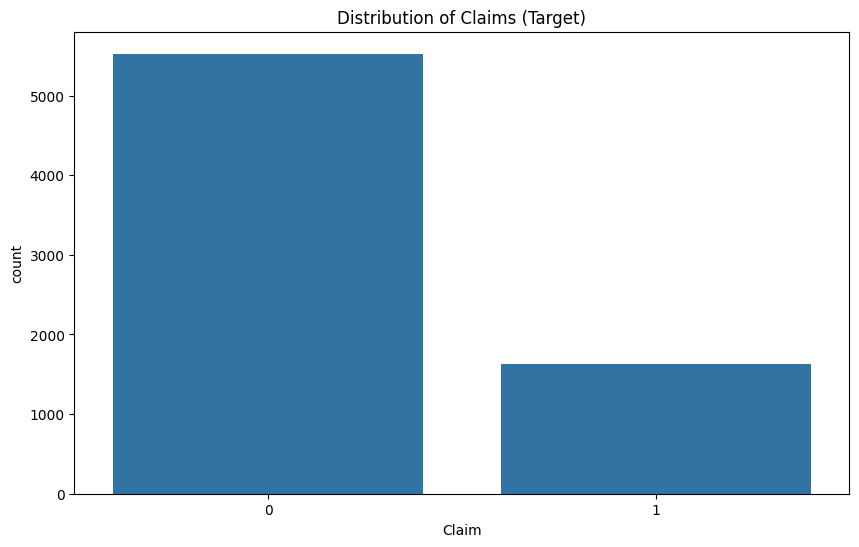

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Claim', data=df_model)
plt.title('Distribution of Claims (Target)')
plt.show()

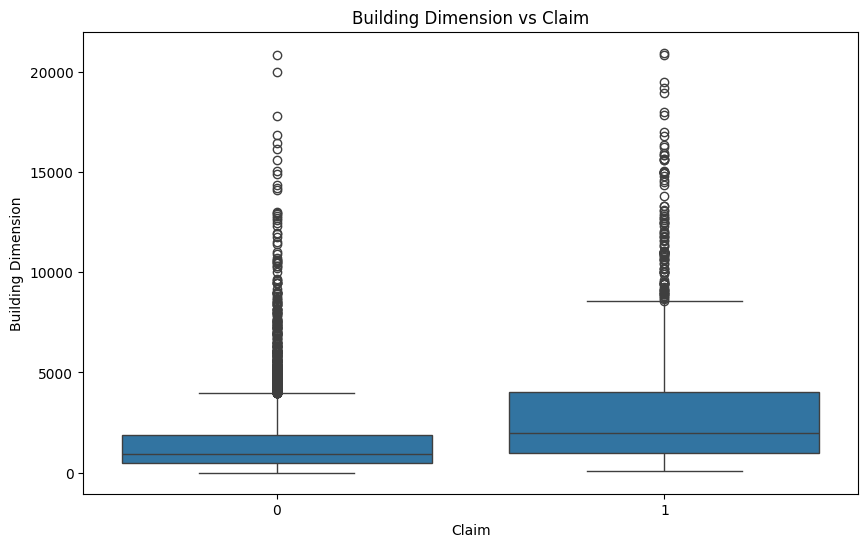

In [ ]:
#Insight: Check correlation of Building Dimension vs Claim

plt.figure(figsize=(10, 6))
sns.boxplot(x='Claim', y='Building Dimension', data=df)
plt.title('Building Dimension vs Claim')
plt.show()

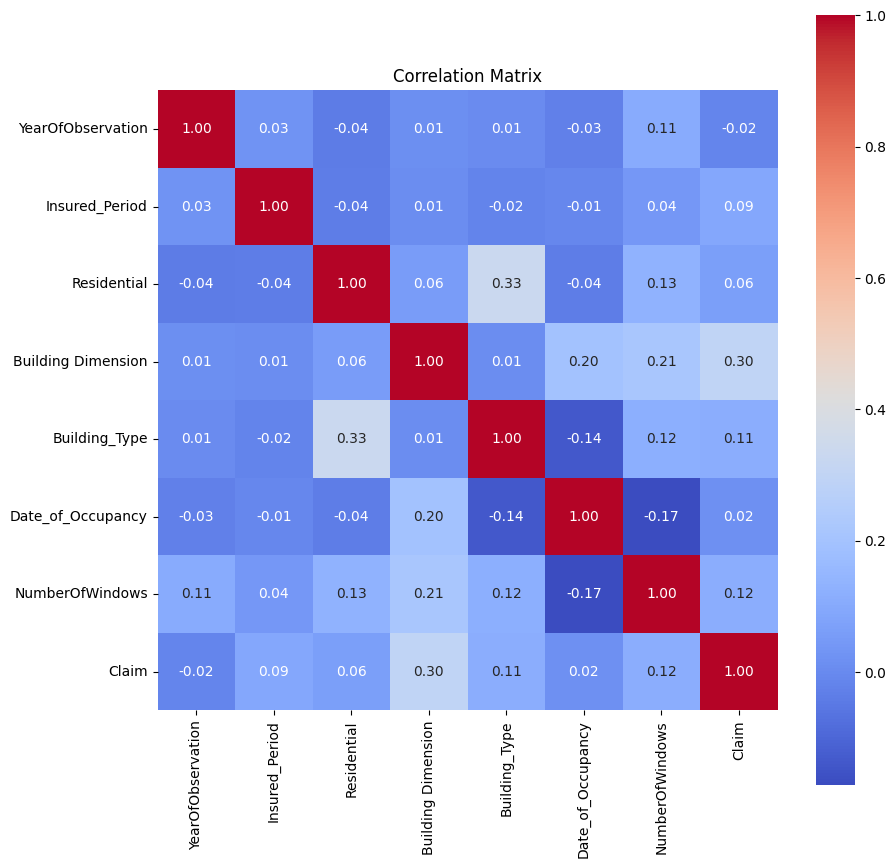

In [54]:
#Top correlated features
corr_matrix = df_model.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

**4. PREPROCESSING**

In [57]:
#Binary Encoding for categorical variables
le = LabelEncoder()
binary_cols = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement']
for col in binary_cols:
    df_model[col] = le.fit_transform(df_model[col])

In [60]:
#Split Data
X = df_model.drop('Claim', axis=1)
y = df_model['Claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**5. MODELING & EVALUATION**

In [61]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [62]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [63]:
y_pred = model.predict(X_test_scaled)

In [64]:
#Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7821229050279329

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87      1105
           1       0.59      0.15      0.24       327

    accuracy                           0.78      1432
   macro avg       0.69      0.56      0.56      1432
weighted avg       0.75      0.78      0.73      1432



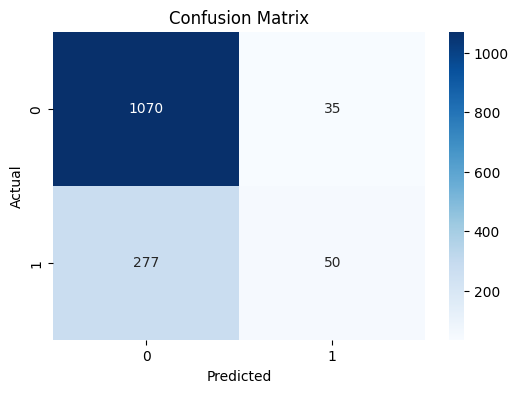

In [65]:
#Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [66]:
from xgboost import XGBClassifier

In [67]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("\n⚡ XGBoost")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))


⚡ XGBoost
Accuracy: 0.7772346368715084
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      1105
           1       0.53      0.24      0.33       327

    accuracy                           0.78      1432
   macro avg       0.67      0.59      0.60      1432
weighted avg       0.74      0.78      0.74      1432



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:09:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [68]:
import joblib

#After training the xgb_model
joblib.dump(xgb_model, "xgb_insurance_claim_model.pkl")

['xgb_insurance_claim_model.pkl']